In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('Books_Data_Clean.csv')
df.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   Publishing Year      1069 non-null   float64
 2   Book Name            1047 non-null   object 
 3   Author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   Author_Rating        1070 non-null   object 
 6   Book_average_rating  1070 non-null   float64
 7   Book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross sales          1070 non-null   float64
 10  publisher revenue    1070 non-null   float64
 11  sale price           1070 non-null   float64
 12  sales rank           1070 non-null   int64  
 13  Publisher            1070 non-null   object 
 14  units sold           1070 non-null   int64  
dtypes: float64(5), int64(4), object(6)
mem

In [5]:
df.describe()

,index,Publishing Year,Book_average_rating,Book_ratings_count,gross sales,publisher revenue,sale price,sales rank,units sold
count,1070.000000,1069.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000,1070.000000
mean,534.500000,1971.377923,4.007000,94909.913084,1856.622944,843.281030,4.869561,611.652336,9676.980374
std,309.026698,185.080257,0.247244,31513.242518,3936.924240,2257.596743,3.559919,369.849830,15370.571306
min,0.000000,-560.000000,2.970000,27308.000000,104.940000,0.000000,0.990000,1.000000,106.000000
25%,267.250000,1985.000000,3.850000,70398.000000,372.465000,0.000000,1.990000,287.500000,551.250000
50%,534.500000,2003.000000,4.015000,89309.000000,809.745000,273.078000,3.990000,595.500000,3924.000000
75%,801.750000,2010.000000,4.170000,113906.500000,1487.957500,721.180500,6.990000,932.500000,5312.250000
max,1069.000000,2016.000000,4.770000,206792.000000,47795.000000,28677.000000,33.860000,1273.000000,61560.000000


In [12]:
df = df[df["Publishing Year"] > 1900]

In [13]:
df.isna().sum()

index                   0
Publishing Year         0
Book Name              17
Author                  0
language_code          31
Author_Rating           0
Book_average_rating     0
Book_ratings_count      0
genre                   0
gross sales             0
publisher revenue       0
sale price              0
sales rank              0
Publisher               0
units sold              0
dtype: int64

In [14]:
df.dropna(subset = "Book Name", inplace = True)

In [16]:
df.duplicated().sum()


np.int64(0)

In [21]:
df.nunique()

index                  731
Publishing Year         26
Book Name              730
Author                 470
language_code            8
Author_Rating            4
Book_average_rating    128
Book_ratings_count     728
genre                    4
gross sales            582
publisher revenue      427
sale price             110
sales rank             637
Publisher                9
units sold             383
dtype: int64

Text(0.5, 1.0, 'Distribution of Publishing Year')

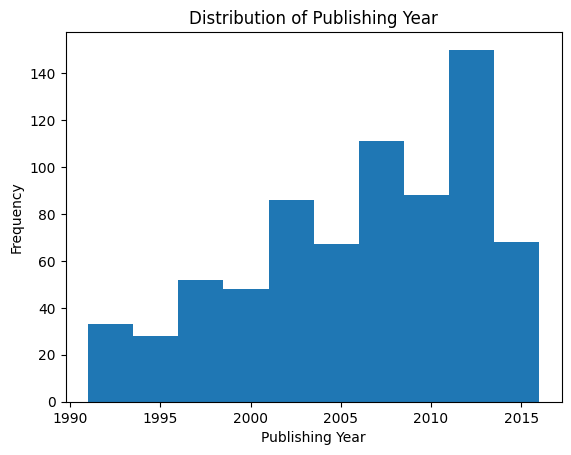

In [23]:
plt.hist(df["Publishing Year"])
plt.xlabel("Publishing Year")
plt.ylabel("Frequency")
plt.title("Distribution of Publishing Year")

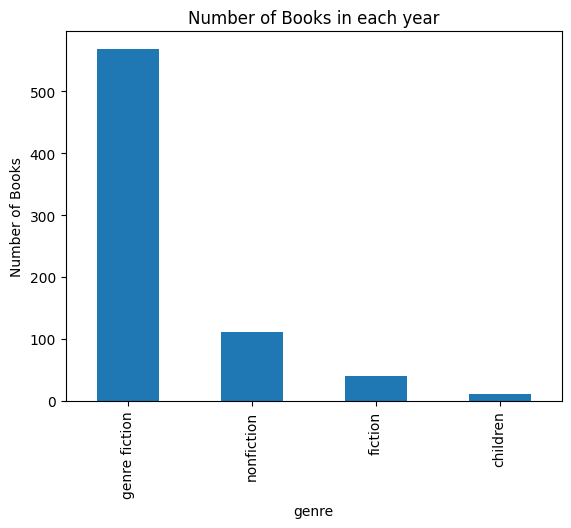

In [28]:
df["genre"].value_counts().plot(kind = "bar")
plt.xlabel("genre")
plt.ylabel("Number of Books")
plt.title("Number of Books in each year")
plt.show()

In [30]:
df.groupby("Author")["Book_average_rating"].mean().sort_values(ascending = False)

Author
George R.R. Martin                4.560000
Sarah J. Maas                     4.526000
Hiromu Arakawa, Akira Watanabe    4.490000
Cassandra Clare                   4.480000
Robert Kirkman                    4.430000
                                    ...   
Chetan Bhagat                     3.273333
Audrey Niffenegger                3.230000
Herman Koch, Sam Garrett          3.220000
P.D. James                        3.210000
Sue Monk Kidd                     3.100000
Name: Book_average_rating, Length: 470, dtype: float64

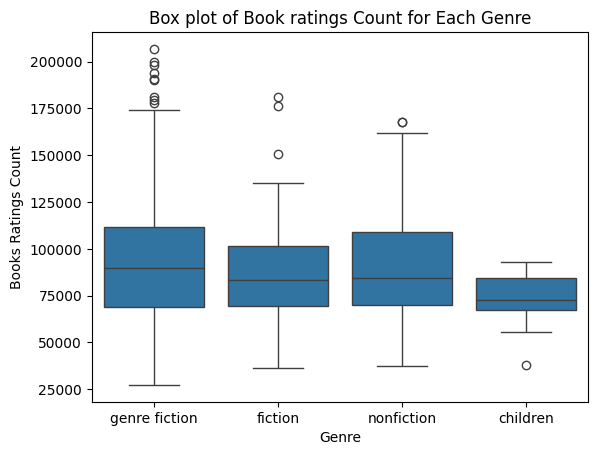

In [34]:
sns.boxplot( x= "genre",  y= "Book_ratings_count" , data=df)
plt.xlabel("Genre")
plt.ylabel("Books Ratings Count")
plt.title("Box plot of Book ratings Count for Each Genre")
plt.show()

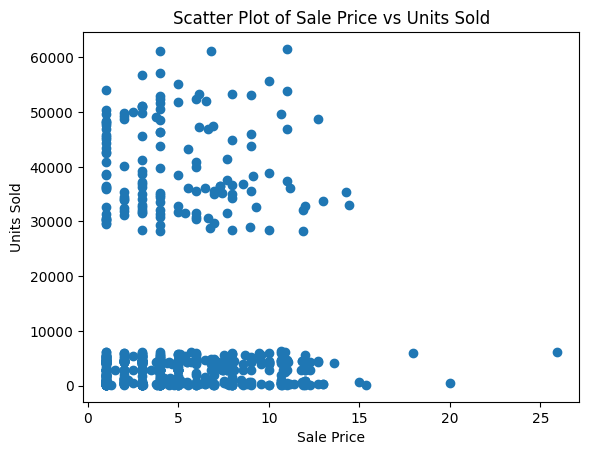

In [38]:
plt.scatter(df["sale price"], df["units sold"])
plt.xlabel("Sale Price")
plt.ylabel("Units Sold")
plt.title("Scatter Plot of Sale Price vs Units Sold")
plt.show()

In [40]:
language_counts=df["language_code"].value_counts()

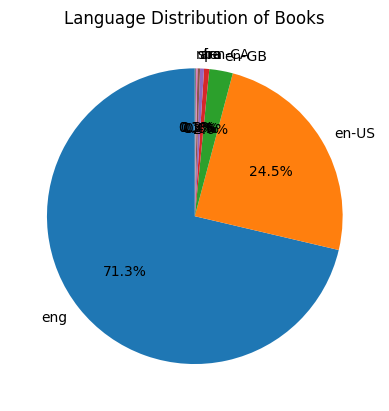

In [45]:
plt.pie(language_counts, labels =language_counts.index, startangle= 90, autopct="%1.1f%%")
plt.title("Language Distribution of Books")
plt.show()


In [49]:
df.groupby("Publisher ")["publisher revenue"].sum().sort_values(ascending = False)

Publisher 
Penguin Group (USA) LLC                 128647.002
Random House LLC                        120250.824
Amazon Digital Services,  Inc.          109249.368
HarperCollins Publishers                 80419.890
Hachette Book Group                      78907.236
Simon and Schuster Digital Sales Inc     29628.912
Macmillan                                24943.146
HarperCollins Christian Publishing        2135.670
HarperCollins Publishing                  2127.654
Name: publisher revenue, dtype: float64

In [50]:
df.groupby("Author_Rating")["publisher revenue"].sum().sort_values(ascending = False)

Author_Rating
Intermediate    434504.658
Excellent        88403.550
Novice           41130.648
Famous           12270.846
Name: publisher revenue, dtype: float64

In [52]:
df.groupby("language_code").size().sort_values(ascending = False)

language_code
eng      500
en-US    172
en-GB     18
en-CA      4
fre        3
ara        2
nl         1
spa        1
dtype: int64

In [54]:
df.groupby("Author_Rating")["Book_ratings_count"].mean().sort_values(ascending = False)

Author_Rating
Famous          98915.710526
Intermediate    97485.152074
Excellent       85308.305085
Novice          82425.869565
Name: Book_ratings_count, dtype: float64

In [55]:
df.groupby("language_code").size().sort_values(ascending = False)

language_code
eng      500
en-US    172
en-GB     18
en-CA      4
fre        3
ara        2
nl         1
spa        1
dtype: int64

In [56]:
df.groupby("Author_Rating")["Book_ratings_count"].var()

Author_Rating
Excellent       5.005616e+08
Famous          1.487331e+09
Intermediate    1.102586e+09
Novice          6.867804e+08
Name: Book_ratings_count, dtype: float64

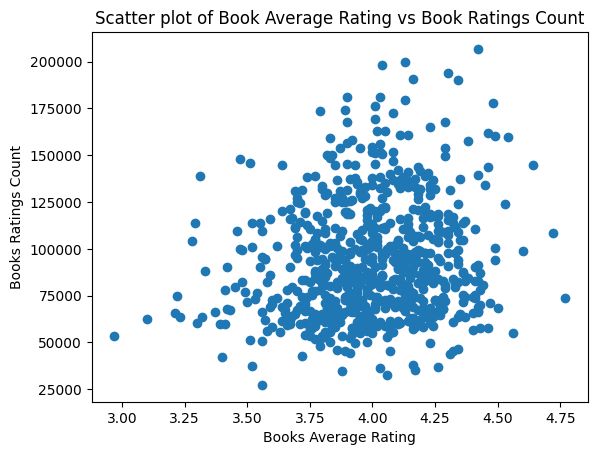

In [57]:
plt.scatter(df["Book_average_rating"], df["Book_ratings_count"])
plt.xlabel("Books Average Rating")
plt.ylabel("Books Ratings Count")
plt.title("Scatter plot of Book Average Rating vs Book Ratings Count")
plt.show()

In [61]:
total_gross_sales_by_author = df.groupby("Author")["gross sales"].sum()

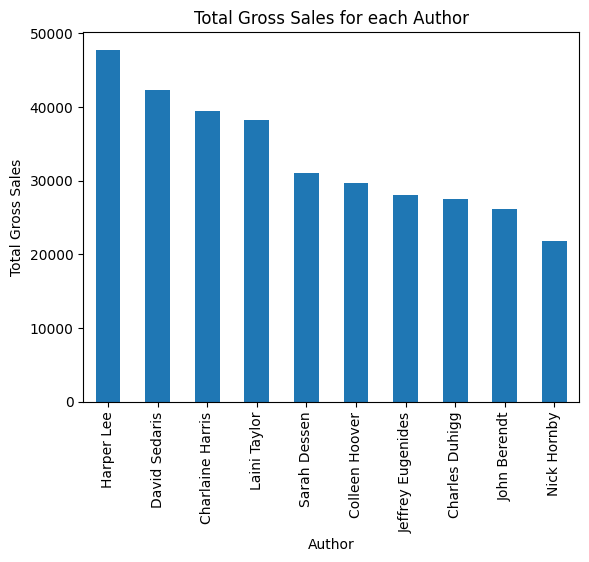

In [65]:
total_gross_sales_by_author.sort_values(ascending= False).head(10).plot(kind ="bar")
plt.xlabel("Author")
plt.ylabel("Total Gross Sales")
plt.title("Total Gross Sales for each Author")
plt.show()

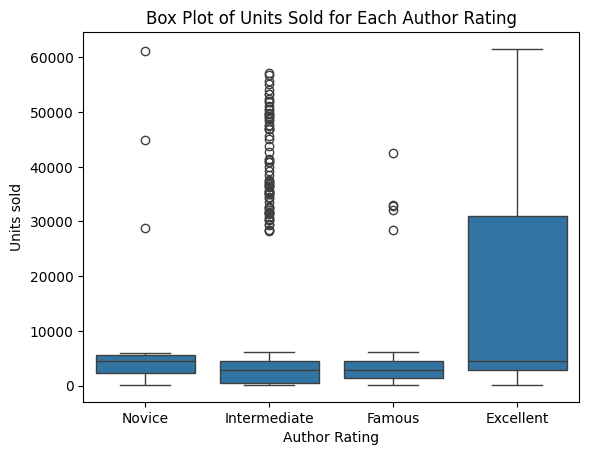

In [66]:
sns.boxplot(x = "Author_Rating", y= "units sold", data=df)
plt.xlabel("Author Rating")
plt.ylabel("Units sold")
plt.title("Box Plot of Units Sold for Each Author Rating")
plt.show()

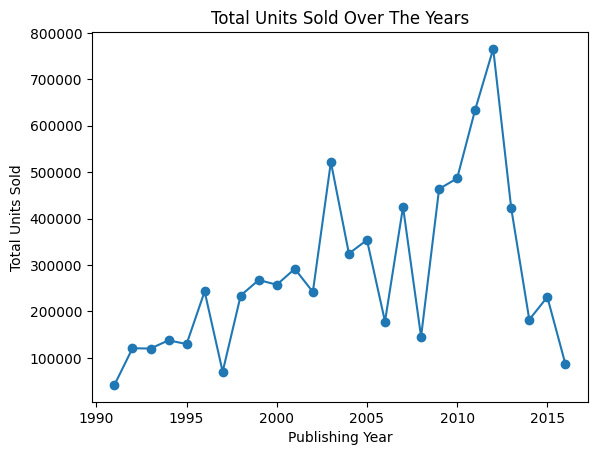

In [69]:
df.groupby("Publishing Year")["units sold"].sum().plot(kind="line", marker="o")
plt.xlabel("Publishing Year")
plt.ylabel("Total Units Sold")
plt.title("Total Units Sold Over The Years")
plt.show()
